## CAPSTONE PROJECT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss




## Importing Dataset

In [3]:
df=pd.read_csv(r'C:\Users\307010447\Desktop\Coursera\Data-Collisions.csv')

C:\Users\307010447\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis

C:\Users\307010447\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


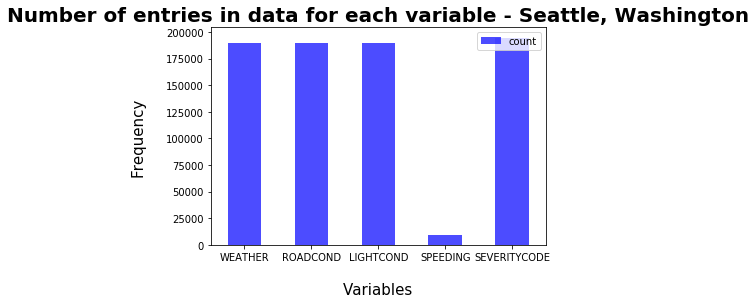

In [4]:
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['blue','blue','blue','blue','blue','blue','blue']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

## Target Variable Distribution

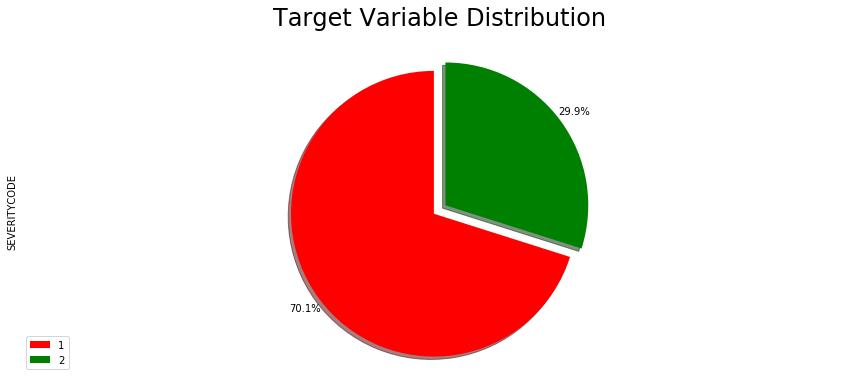

In [44]:

explode_list = [0.05, 0.05]
color_list=['red','green']
addtype=df['SEVERITYCODE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Target Variable Distribution', fontsize=24, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

## Area type of each accident

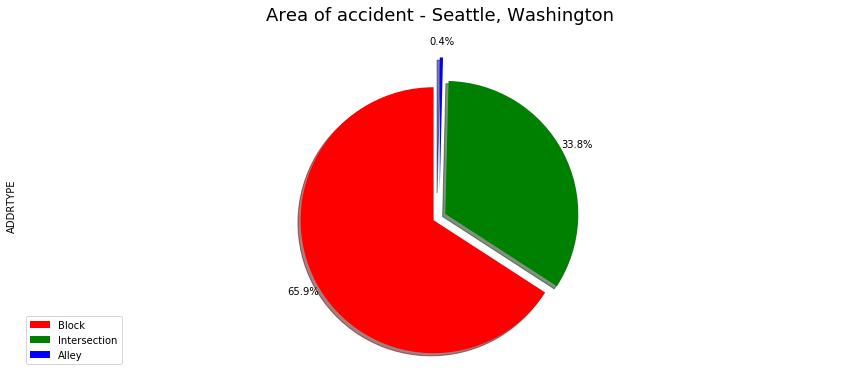

In [11]:

explode_list = [0.05, 0.05, 0.2]
color_list=['red','green','blue']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

## Deleting unnecassary columns from dataset

In [15]:
# Drop all columns with no predictive value for the context of this project
colData = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# Label Encoding
# Convert column to category
colData["WEATHER"] = colData["WEATHER"].astype('category')
colData["ROADCOND"] = colData["ROADCOND"].astype('category')
colData["LIGHTCOND"] = colData["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
colData["WEATHER_CAT"] = colData["WEATHER"].cat.codes
colData["ROADCOND_CAT"] = colData["ROADCOND"].cat.codes
colData["LIGHTCOND_CAT"] = colData["LIGHTCOND"].cat.codes

colData.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [16]:
colData.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [17]:
colData["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [18]:
colData["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [19]:
colData["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:

colData["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

## Balancing Dataset

In [21]:
from sklearn.utils import resample
# Seperate majority and minority classes
colData_majority = colData[colData.SEVERITYCODE==1]
colData_minority = colData[colData.SEVERITYCODE==2]

#Downsample majority class
colData_majority_downsampled = resample(colData_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
colData_balanced = pd.concat([colData_majority_downsampled, colData_minority])

# Display new class counts
colData_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [22]:
X = np.asarray(colData_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]


array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [23]:
y = np.asarray(colData_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

## Create Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


## KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [27]:
#Train Model & Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([2, 2, 1, 1, 2], dtype=int64)

In [28]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, Kyhat)


C:\Users\307010447\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.564001947698565

In [29]:
# F1-SCORE
f1_score(y_test, Kyhat, average='macro')

0.5401775308974308

## Decision Tree Model

In [30]:

from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# Train Model & Predict
DTyhat = colDataTree.predict(X_test)
print (y_test [0:5])

[2 2 1 1 1]


In [32]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, DTyhat)

C:\Users\307010447\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5664365709048206

In [33]:
# F1-SCORE
f1_score(y_test, DTyhat, average='macro')


0.5450597937389444

## Confusion Matrix for Decision Tree

In [45]:
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), DTyhat.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(DTyhat,y_test))

Confusion Matrix - Decision Tree
Predicted     1      2    All
True                         
1          6104  11305  17409
2          3832  13672  17504
All        9936  24977  34913
              precision    recall  f1-score   support

           1       0.35      0.61      0.45      9936
           2       0.78      0.55      0.64     24977

    accuracy                           0.57     34913
   macro avg       0.57      0.58      0.55     34913
weighted avg       0.66      0.57      0.59     34913



Confusion matrix, without normalization
[[ 6104 11305]
 [ 3832 13672]]


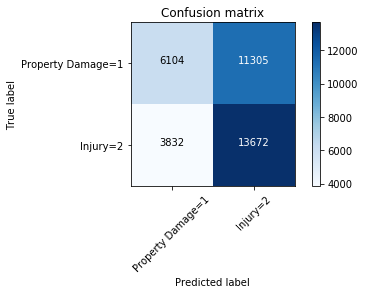

In [46]:
  #COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, DTyhat, labels=[1,2])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=1','Injury=2'],normalize= False,  title='Confusion matrix')


## Logistic Regression Model

In [36]:
# Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
LRyhat = LR.predict(X_test)
LRyhat

array([1, 2, 1, ..., 2, 2, 2], dtype=int64)

In [38]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57, 0.43],
       [0.47, 0.53],
       [0.68, 0.32],
       ...,
       [0.47, 0.53],
       [0.47, 0.53],
       [0.47, 0.53]])

In [39]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LRyhat)

C:\Users\307010447\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5260218256809784

In [40]:
# F1-SCORE
f1_score(y_test, LRyhat, average='macro')

0.511602093963383

In [41]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6849535383198887

Confusion matrix, without normalization
[[ 6183 11226]
 [ 5322 12182]]


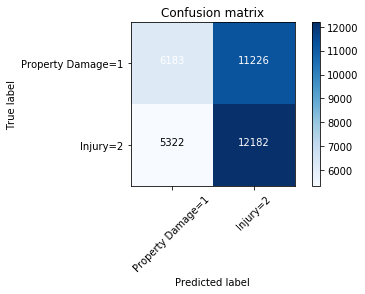

In [42]:
#COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, LRyhat, labels=[1,2])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

